# Trabalho Prático de Dados e Aprendizagem Automática 
#### Universidade do Minho, MEI
### Grupo 39
* Daniel Xavier, PG 50310
* Diogo Rebelo, PG 50327
* Henrique Alvelos, PG 50414
* João Cerquido, PG 50469

## Previsão da Ocupação de uma Sala
### Introdução
Este trabalho prático desenvolve-se no âmbito da UC de Dados e Aprendizagem Automática, do Mestrado em Engenharia Informática, na Universidade do Minho, tendo como objetivo primordial a construção de competências de Machine Learning, através do estudo aprofundado de um dataset selecionado pelo próprio grupo. Espera-se que, no final do trabalho, o grupo possua um modelo de ML bem construído e devidamente suportado, de acordo com uma metodologia selecionada e bem descrita. Neste contexto, torna-se relevante efetuar um estudo completo que, por isso, tenha em conta as diversas fases de conceção de modelos de conhecimento, desde a visualização dos dados, ao seu tratamento e conceção do modelo. Esta primeira parte do trabalho prende-se com a seleção de um dataset e a sua análise. Então, deixemos abaixo a nossa motivação para a escolha do mesmo e alguns conceitos importantes para a sua boa compreensão.

### Informações do Dataset Selecionado
#### Contexto de desenvolvimento da *raw data* & Motivação
Ultimamente, temos sido bombardeados com o aumento do consumo energético no planeta, a escassez de recursos é cada vez mais notável e não é preciso recorrer a uma grande escala para o comprovar. A nossa própria instituição académica tem sido alvo deste consumo energético exagerado e tem sentido na pele as suas consequências, tendo mesmo o Reitor proposto medidas a adotar este Inverno para combater este aumento nos contratos de fornecimento. Sabemos que nos edifícios, grande parte da energia é gasta em sistemas de aquecimento, ventilação e ar condicionado. Uma maneira de otimizar seu uso é adaptá-los ao número de pessoas do edifício ou mesmo divisão. Então, consideramos super relevante escolher um dataset que ilustrasse um método de contrariar ou pelo menos diminuir o impacto do consumo energético na academia.

No sentido de prever o número de pessoas que ocupam determinada divisão, foram utilizados sensores não intrusivos de medição de CO2, temperatura, iluminação, som e movimento, numa sala por vários dias. A disposição dos sensores na sala mostra-se de seguida, para melhor compreensão:

<img src="../images/occupancy.png" alt="drawing" width="400"/>

#### Features & Target
O problema em questão prende-se com a previsão do número de pessoas que ocupam uma sala, podendo, então, este classificar-se este problema como uma problema de regressão linear, já que o objetivo é prever um valor numérico específico (o número de pessoas na sala), com base nas caractrísticas captadas pelos sensores descritas acima.

O nosso dataset é constituído pelos seguintes parâmetros:

* **Categóricos:**
    * **Ordinais:**
        * **Date:** (YYYY/MM/DD) data da recolha dos valores captados pelos sensores;
        * **Time:** (HH:MM:SS) momento temporal de captação;
    * **Numéricos:**
        * **Discreto:**
            * **Room_Occupancy_Count:** número de pessoas na sala (determinado manualmente por uma pessoa);
        * **Contínuos:**
            * **S1_Temp:** temperatura captada pelo sensor 1 em graus Celsius.
            * **S2_Temp:** temperatura captada pelo sensor 2 em graus Celsius.
            * **S3_Temp:** temperatura captada pelo sensor 3 em graus Celsius.
            * **S4_Temp:** temperatura captada pelo sensor 4 em graus Celsius.
            * **S1_Light:** luminosidade captada pelo sensor 1 em LUX (unidade SI de fluxo luminoso por unidade de área, ou seja da densidade de intensidade luminosa conhecida por iluminância. Corresponde à incidência perpendicular de um fluxo luminoso de 1 lúmen sobre uma superfície com 1 metro quadrado);
            * **S2_Light:** luminosidade captada pelo sensor 2 em LUX;
            * **S3_Light:** luminosidade captada pelo sensor 3 em LUX;
            * **S4_Light:** luminosidade captada pelo sensor 4 em LUX;
            * **S1_Sound:** som captado pelo sensor 1 em Volts (o que determina a diferença entre sinais de áudio é a sua voltagem, já que é o nível de voltagem que determina a força ou intensidade do sinal);
            * **S2_Sound:** som captado pelo sensor 2 em Volts;
            * **S3_Sound:** som captado pelo sensor 3 em Volts;
            * **S4_Sound:** som captado pelo sensor 4 em Volts;
            * **S5_CO2:** concentração de CO2 captada pelo sensor 5 em PPM;
            * **S5_CO2_Slope:** inclinação de CO2 captada pelo sensor 5;
            * **S6_PIR:** sensor 6 PIR (digital passive infrared) para deteção de movimento (através de infravermelhos);
            * **S7_PIR:** sensor 7 PIR (digital passive infrared) para deteção de movimento;


### Primeiro Contacto com o Dataset
#### Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.metrics import mean_absolute_error, plot_confusion_matrix, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
import math
from sklearn.metrics import accuracy_score
%matplotlib inline

#### Leitura

In [2]:
# leitura do dataset
df = pd.read_csv("input/Occupancy_Estimation.csv")

#### Características Gerais

In [3]:
# ver cabeçalho
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
df.info()

<bound method DataFrame.info of              Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_Sou

In [5]:
df.describe()

<bound method NDFrame.describe of              Date      Time  S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  \
0      2017/12/22  10:49:41    24.94    24.75    24.56    25.38       121   
1      2017/12/22  10:50:12    24.94    24.75    24.56    25.44       121   
2      2017/12/22  10:50:42    25.00    24.75    24.50    25.44       121   
3      2017/12/22  10:51:13    25.00    24.75    24.56    25.44       121   
4      2017/12/22  10:51:44    25.00    24.75    24.56    25.44       121   
...           ...       ...      ...      ...      ...      ...       ...   
10124  2018/01/11  08:58:07    25.06    25.13    24.69    25.31         6   
10125  2018/01/11  08:58:37    25.06    25.06    24.69    25.25         6   
10126  2018/01/11  08:59:08    25.13    25.06    24.69    25.25         6   
10127  2018/01/11  08:59:39    25.13    25.06    24.69    25.25         6   
10128  2018/01/11  09:00:09    25.13    25.06    24.69    25.25         6   

       S2_Light  S3_Light  S4_Light  S1_S

In [6]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

Algumas colunas podem não parecer relevantes para o target a prever, nomeadamente a data e a hora a que os dados foram obtidos, já que parecem ser uma espécie de elemento identificativo (id) de cada caso, todavia, através das horas e dos dias, conseguimos, por exemplo, saber quais os picos de utilização da sala, os horários propícios à sua ocupação, podendo assim inferir se a sala está ou não ocupada. Então, decidimos não eliminar estes dados, pelo menos para já.

In [7]:
df.shape

(10129, 19)

In [8]:
df["S1_Temp"].value_counts()

25.44    1132
25.19    1108
25.38    1024
25.06     995
25.13     980
25.31     860
25.25     703
25.50     293
25.94     292
26.25     268
26.19     268
25.56     246
25.81     244
26.06     232
25.88     231
25.69     226
25.63     207
26.00     193
26.13     173
25.75     165
26.31     143
25.00     125
26.38      19
24.94       2
Name: S1_Temp, dtype: int64

In [9]:
df["S2_Temp"].value_counts()

25.44    1389
25.13     964
25.38     947
25.06     939
25.19     896
         ... 
28.63       2
28.69       2
29.00       2
28.75       1
28.88       1
Name: S2_Temp, Length: 69, dtype: int64

In [10]:
df["S3_Temp"].value_counts()

24.56    812
24.63    745
24.69    651
24.94    620
24.81    611
24.88    572
25.06    570
24.75    539
25.00    525
25.13    435
25.19    390
25.38    365
25.50    344
24.50    341
25.25    295
25.31    256
25.56    253
25.75    225
25.94    213
25.88    195
24.44    195
25.44    191
25.69    177
25.81    173
25.63    162
26.00    131
26.06    105
26.13     36
26.19      2
Name: S3_Temp, dtype: int64

In [11]:
df["S4_Temp"].value_counts()

25.75    728
25.69    721
25.81    703
26.31    698
25.88    624
25.63    585
25.25    541
25.44    525
25.31    525
25.56    474
25.50    448
25.94    444
25.38    413
26.00    409
26.38    375
25.19    370
26.06    355
26.13    338
26.25    312
26.19    211
25.13    147
26.44    116
25.06     34
25.00     21
26.50     10
26.56      1
24.94      1
Name: S4_Temp, dtype: int64

In [12]:
df["S1_Sound"].value_counts()

0.07    3833
0.08    3501
0.06     779
0.09     244
0.10      92
        ... 
2.79       1
2.49       1
3.51       1
2.59       1
3.16       1
Name: S1_Sound, Length: 231, dtype: int64

In [13]:
df["S2_Sound"].value_counts()

0.05    5809
0.04    1426
0.06    1047
0.07     144
0.08      89
        ... 
2.12       1
1.78       1
3.13       1
2.25       1
2.54       1
Name: S2_Sound, Length: 185, dtype: int64

In [14]:
df["S3_Sound"].value_counts()

0.06    5499
0.05    1398
0.07    1380
0.08     181
0.09      97
        ... 
2.92       1
1.24       1
2.34       1
0.79       1
2.24       1
Name: S3_Sound, Length: 258, dtype: int64

In [15]:
df["S4_Sound"].value_counts()

0.06    2878
0.10    1914
0.09    1663
0.08     991
0.07     869
        ... 
1.36       1
1.35       1
1.84       1
0.87       1
1.80       1
Name: S4_Sound, Length: 106, dtype: int64

In [16]:
df["S1_Light"].value_counts()

0      5845
6       333
5       278
10      218
14      198
       ... 
93        1
153       1
107       1
112       1
144       1
Name: S1_Light, Length: 68, dtype: int64

In [17]:
df["S2_Light"].value_counts()

0      5846
6       268
7       226
5       222
20      208
       ... 
220       1
207       1
185       1
200       1
258       1
Name: S2_Light, Length: 82, dtype: int64

In [18]:
df["S3_Light"].value_counts()

0      5591
180     178
32      110
75       99
35       94
       ... 
271       1
250       1
261       1
215       1
169       1
Name: S3_Light, Length: 177, dtype: int64

In [19]:
df["S4_Light"].value_counts()

0     5599
10     325
7      201
20     176
21     168
      ... 
66       7
69       7
67       6
64       5
68       2
Name: S4_Light, Length: 75, dtype: int64

In [20]:
df["S5_CO2"].value_counts()

355     2550
360     1391
345     1179
350      714
365      438
        ... 
1235       1
1090       1
1145       1
1130       1
1260       1
Name: S5_CO2, Length: 186, dtype: int64

In [21]:
df["S5_CO2_Slope"].value_counts()

 0.000000    4495
-0.046154      84
-0.042308      63
-0.034615      53
-0.030769      52
             ... 
 5.076923       1
 4.873077       1
 4.573077       1
 4.323077       1
-0.319231       1
Name: S5_CO2_Slope, Length: 1579, dtype: int64

In [22]:
df["S6_PIR"].value_counts()

0    9216
1     913
Name: S6_PIR, dtype: int64

In [23]:
df["S7_PIR"].value_counts()

0    9323
1     806
Name: S7_PIR, dtype: int64

### Visualização de Dados
Vamos começar por observar como os dados estão distribuidos de um modo genérico. É importante nesta fase observar possíveis relações entre cada variável, através dos gráficos, nomeadamente, de correlação, começando a perceber como é que está organizado o conjunto de dados e inferindo sobre a sua relação com o nosso target. Também nesta fase, já conseguimos identificar a existência de desbalanceamento, algo crucial a tratar se for o caso.

##### Desbalanceamento

array([[<AxesSubplot:title={'center':'Room_Occupancy_Count'}>]],
      dtype=object)

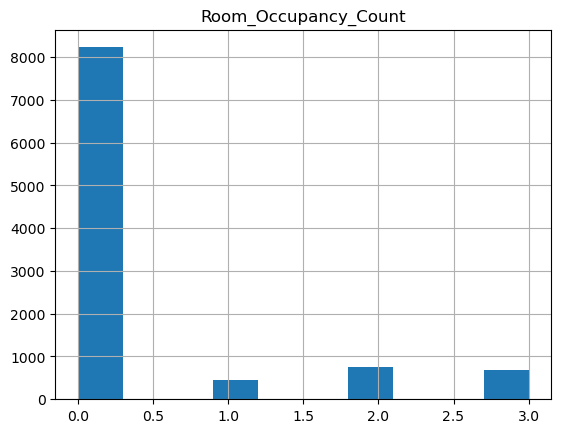

In [24]:
# desbalaceamento ?
df.hist(column="Room_Occupancy_Count")

Desde já, apenas com um plot do target, observamos que existem muitos mais registo para quando o target é 0, quando comparado para outros números de ocupação.

#### Duplicados

In [25]:
df.isna().any()

Date                    False
Time                    False
S1_Temp                 False
S2_Temp                 False
S3_Temp                 False
S4_Temp                 False
S1_Light                False
S2_Light                False
S3_Light                False
S4_Light                False
S1_Sound                False
S2_Sound                False
S3_Sound                False
S4_Sound                False
S5_CO2                  False
S5_CO2_Slope            False
S6_PIR                  False
S7_PIR                  False
Room_Occupancy_Count    False
dtype: bool

A informação recolhida pelos sensores é ao longo de 4 dias e por timestamp específico, então, a existência de elementos duplicados não traz novo conhecimento ao que se pretende prever, já que se tratam de registos exatamente iguais, levando apenas a um overfitting de dados.

In [26]:
print(df.duplicated().sum())

0


### Missing Values

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64


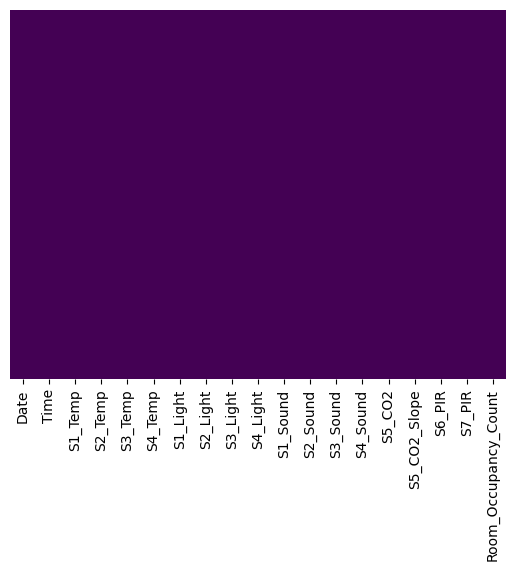

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
print(df.isnull().sum())

#### Outliers

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


Só a partir daqui já é possível detetar a presença de outliers. A feature que salta à vista é, por exemplo, a componente de CO2 detetada pelo Sensor 5, observa-se que o valor médio é 460.860401 e o valor máximo é 1270.000000 (um valor muito distante da média). O mesmo acontece com S1_Light, S2_Light, S3_Light e S4_Light. Isso é facilmente visualizado no gráfico abaixo.

<AxesSubplot:>

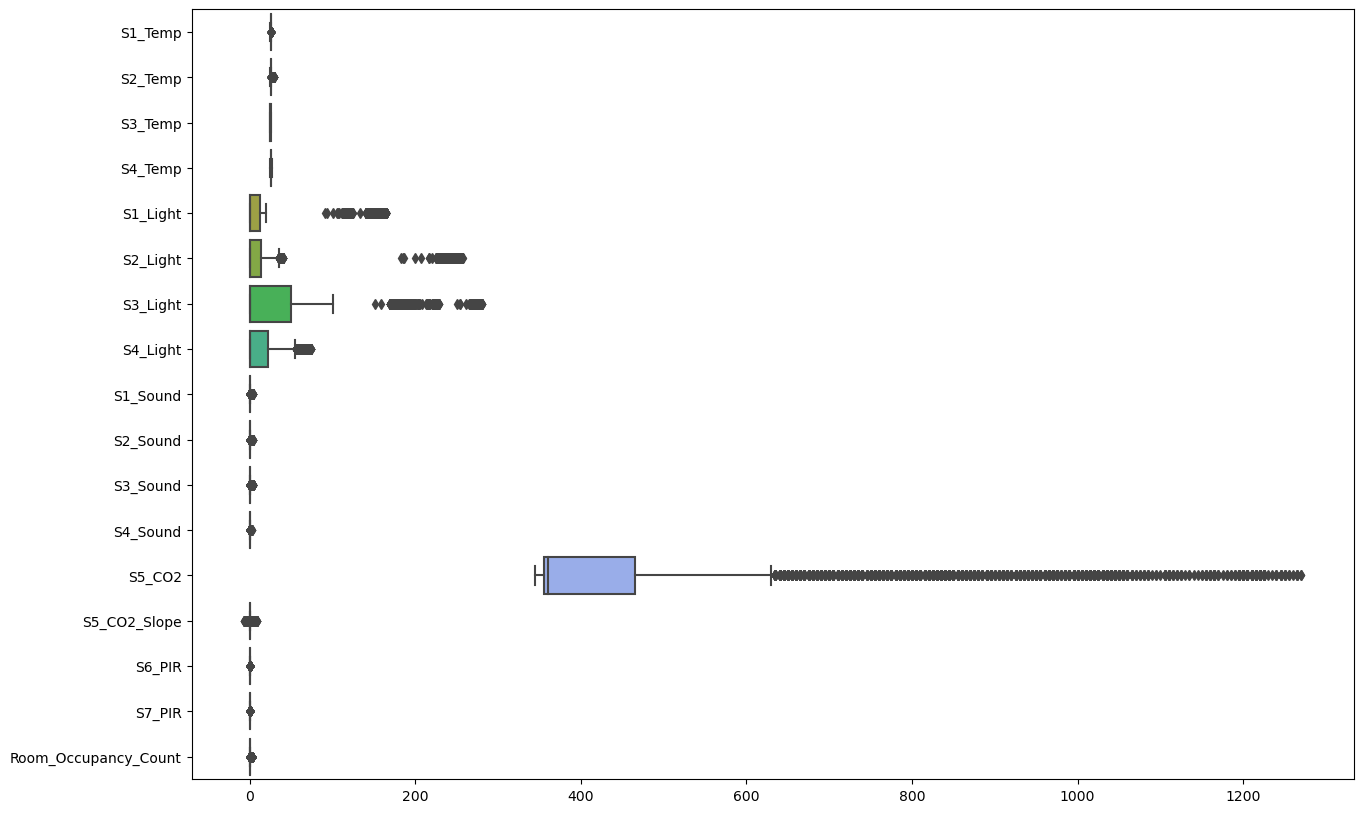

In [29]:
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient ="h")

Vamos, então, mais tarde, observar feature por feature, a existência de outliers.
Para a deteção de outliers em cada coluna, podemos recorrer ao método estatístico de cálculo, identificando, as barreiras e observando que valores ficam fora destas, mas existem outros métodos.

#### Relação entre variáveis

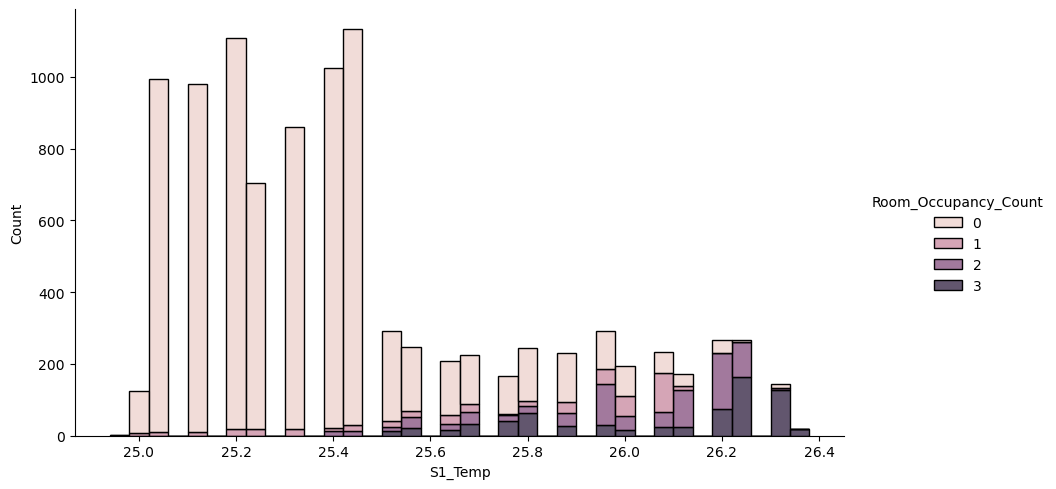

In [30]:
sns.displot(data=df, x="S1_Temp", hue="Room_Occupancy_Count", multiple="stack", aspect=14/8)

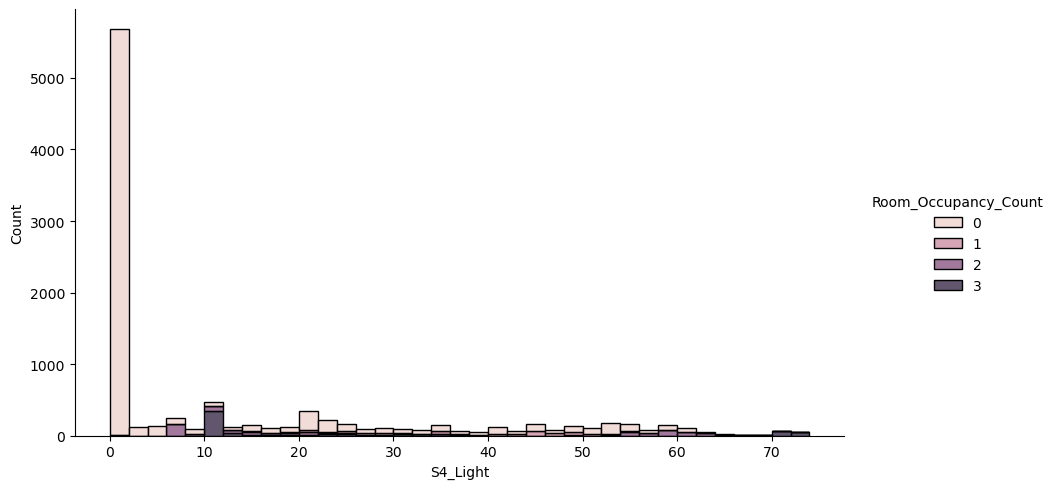

In [31]:
sns.displot(data=df, x="S4_Light", hue="Room_Occupancy_Count", multiple="stack", aspect=14/8)

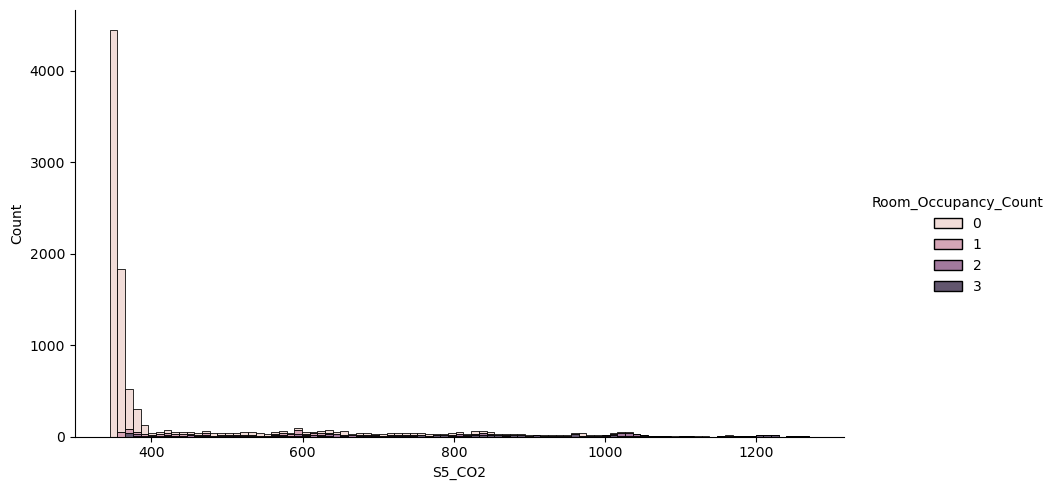

In [32]:
sns.displot(data=df, x="S5_CO2", hue="Room_Occupancy_Count", multiple="stack", aspect=14/8)

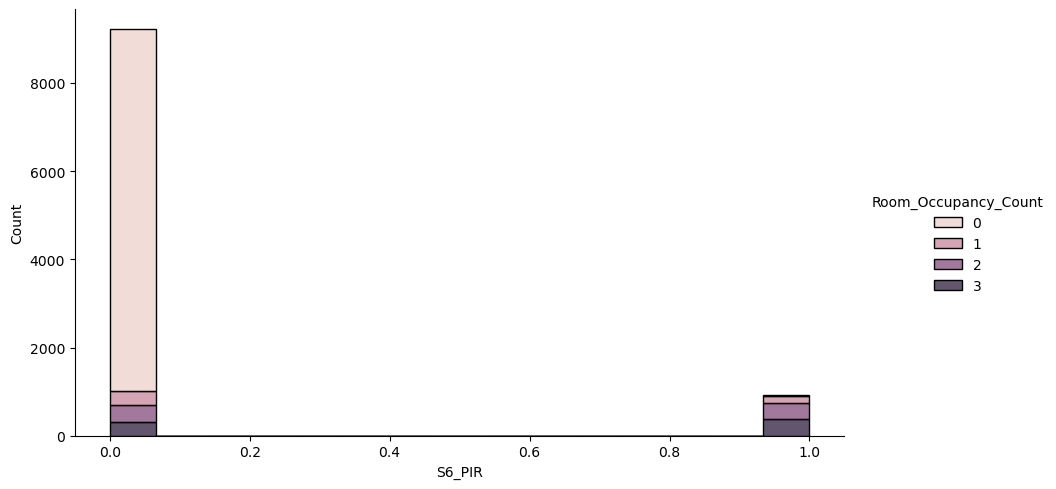

In [33]:
sns.displot(data=df, x="S6_PIR", hue="Room_Occupancy_Count", multiple="stack", aspect=14/8)

### Análise de valores do Sensor 1 no dia 1 ao longo do tempo
(o mesmo raciocínio pode ser feito para os outros dias e para os restantes sensores)

<AxesSubplot:xlabel='Record_Hour', ylabel='S1_Sound'>

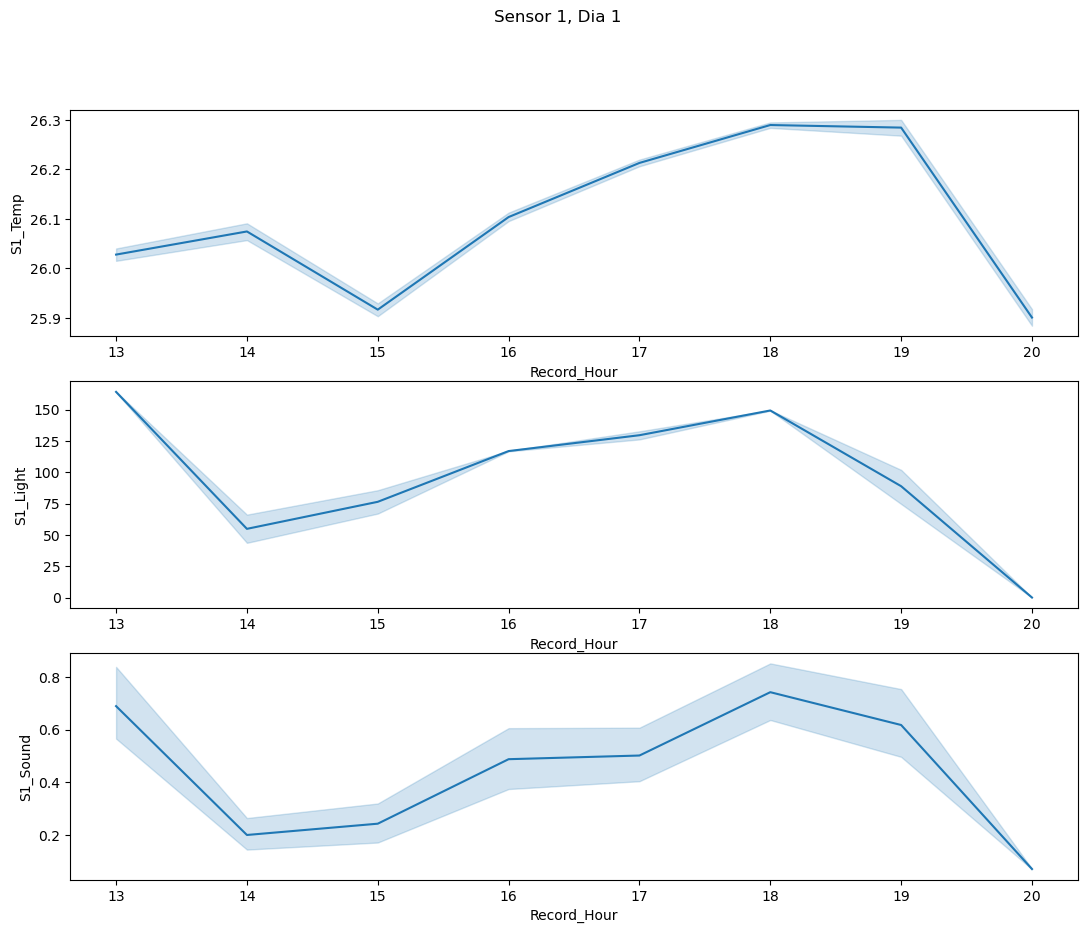

In [34]:
# filtrar por dia o nosso dataset
# queremos a temperatura do S1 no dia 1 entre as 12h e as 21h (como exemplo)
df_day1 = df.copy()
fig, axs = plt.subplots(3,1, figsize=(13,10))
fig.suptitle('Sensor 1, Dia 1')


# obter apenas as horas
df_day1["Time"] = pd.to_datetime(df_day1["Time"], format='%H:%M:%S', errors='coerce')
df_day1["Record_Hour"] = df_day1["Time"].dt.hour

# observar
df_day1_filtered = df_day1.loc[(df_day1["Date"] == "2017/12/22") & (df_day1["Record_Hour"] > 12) & (df_day1["Record_Hour"] < 21)]
sns.lineplot(x = "Record_Hour", y ="S1_Temp", data=df_day1_filtered, ax=axs[0])
sns.lineplot(x = "Record_Hour", y ="S1_Light", data=df_day1_filtered, ax=axs[1])
sns.lineplot(x = "Record_Hour", y ="S1_Sound", data=df_day1_filtered, ax=axs[2])

### Observação dos valores de CO2 no dia 1

<AxesSubplot:xlabel='Record_Hour', ylabel='S5_CO2_Slope'>

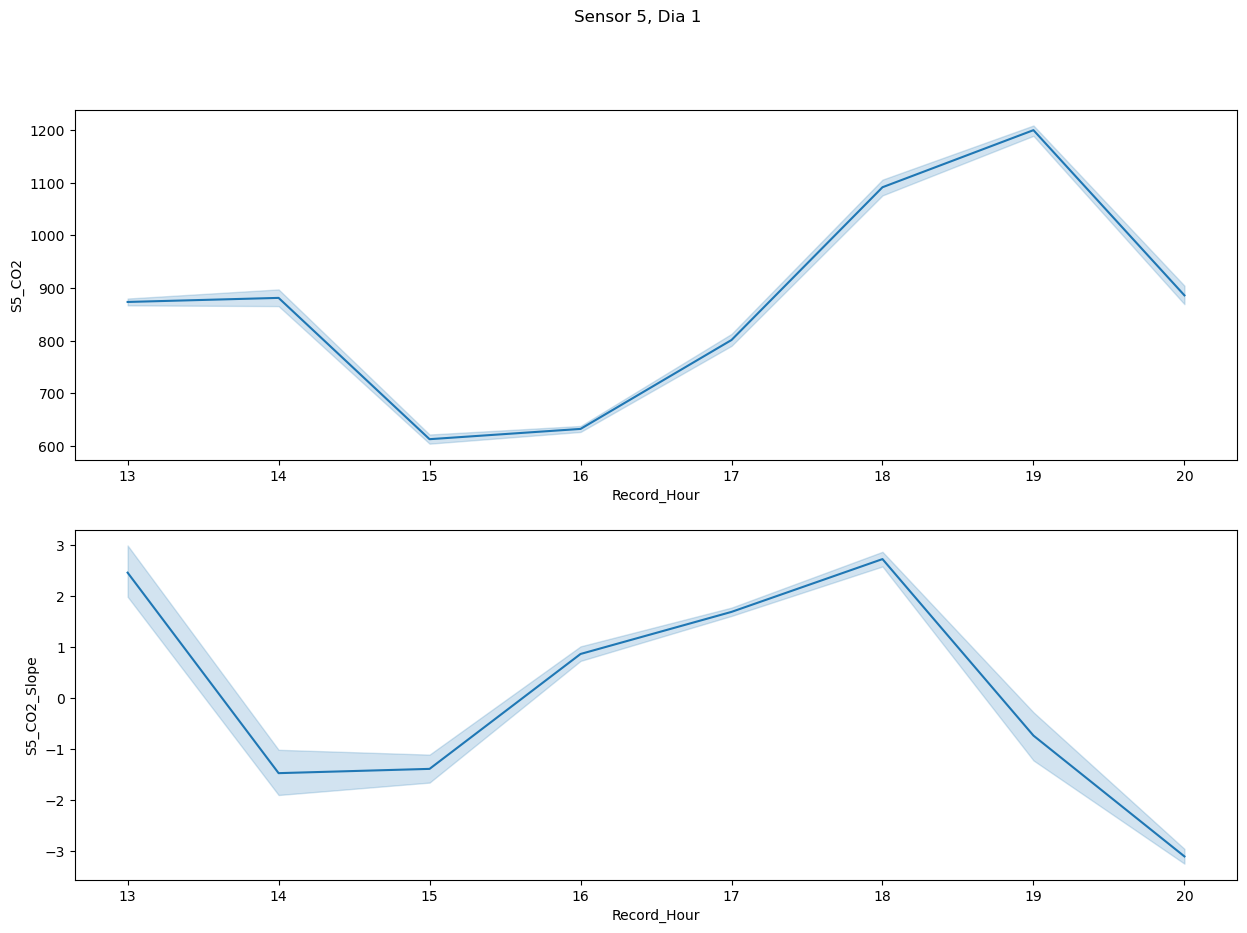

In [35]:
fig, axs = plt.subplots(2,1, figsize=(15,10))
fig.suptitle('Sensor 5, Dia 1')
sns.lineplot(x = "Record_Hour", y ="S5_CO2", data=df_day1_filtered, ax=axs[0])
sns.lineplot(x = "Record_Hour", y ="S5_CO2_Slope", data=df_day1_filtered, ax=axs[1])

#### Observação da ocupação ao longo do tempo em cada dia

<AxesSubplot:xlabel='Record_Hour', ylabel='Room_Occupancy_Count'>

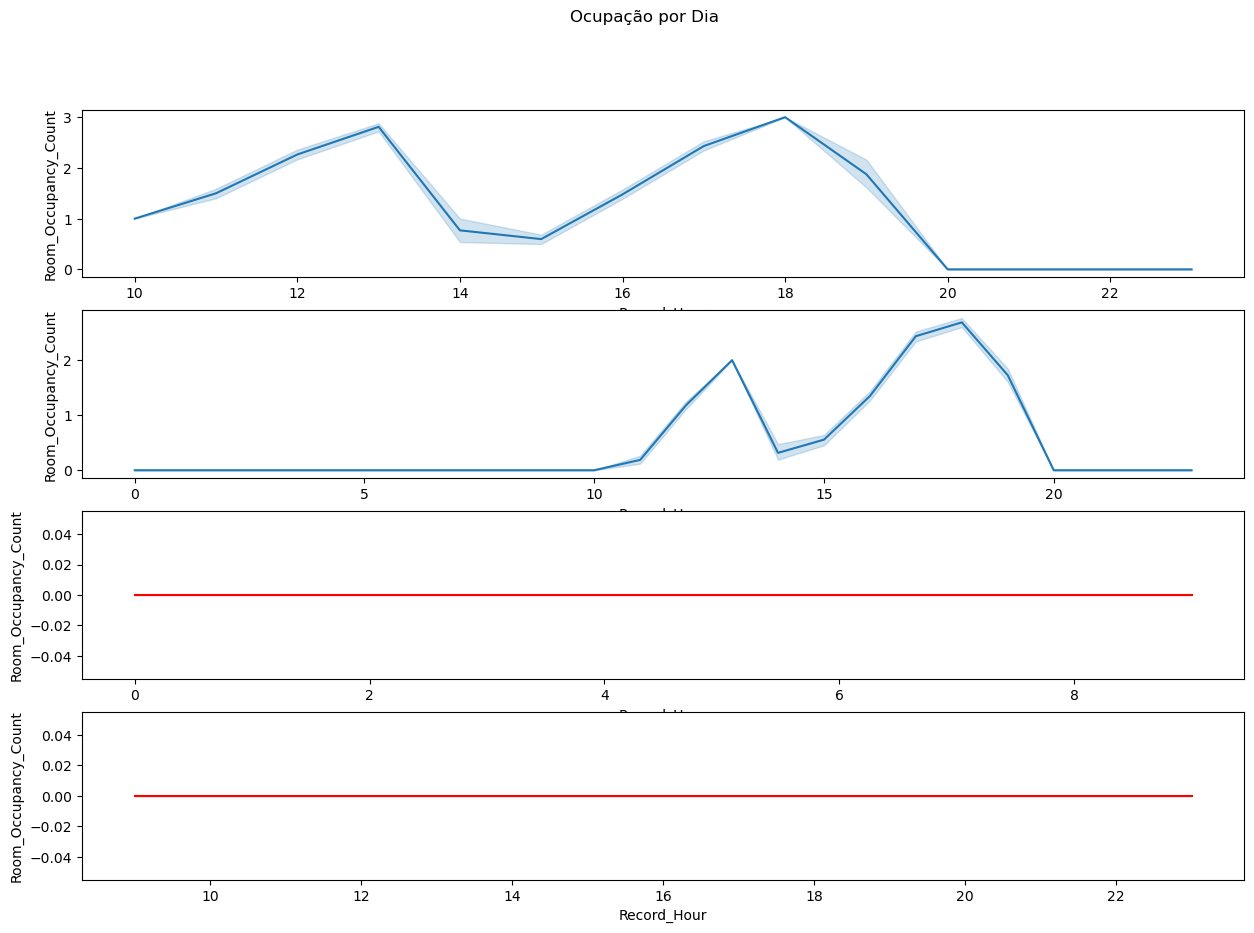

In [36]:
fig, axs = plt.subplots(4,1, figsize=(15,10))
fig.suptitle('Ocupação por Dia')
df_day12_filtered = df_day1.loc[(df_day1["Date"] == "2017/12/22")]
df_day2_filtered = df_day1.loc[(df_day1["Date"] == "2017/12/23")]
df_day3_filtered = df_day1.loc[(df_day1["Date"] == "2017/12/24")]
df_day4_filtered = df_day1.loc[(df_day1["Date"] == "2017/12/25")]
sns.lineplot(x = "Record_Hour", y ="Room_Occupancy_Count", data=df_day12_filtered, ax=axs[0])
sns.lineplot(x = "Record_Hour", y ="Room_Occupancy_Count", data=df_day2_filtered, ax=axs[1])
sns.lineplot(x = "Record_Hour", y ="Room_Occupancy_Count", data=df_day3_filtered, ax=axs[2], color="red")
sns.lineplot(x = "Record_Hour", y ="Room_Occupancy_Count", data=df_day4_filtered, ax=axs[3], color="red")

Exatamente o que se esperava. Se reparamos, durante os dias 24 e 25, dias de véspera e natal, não é esperado que as pessoas ocupem a sala, contudo, nos dias 22 e 23, é sim esperado. Também se observa maior ocupação durantes as horas de almoço (entre as 12h e 14h) e durante a tarde (entre as 15h e 
20h), o que pode significar uma menor ocupação à noite ou de manhã, na generalidade. Mas isto será analisado mais afundo posteriormente. 

#### Distribuição dos Dados

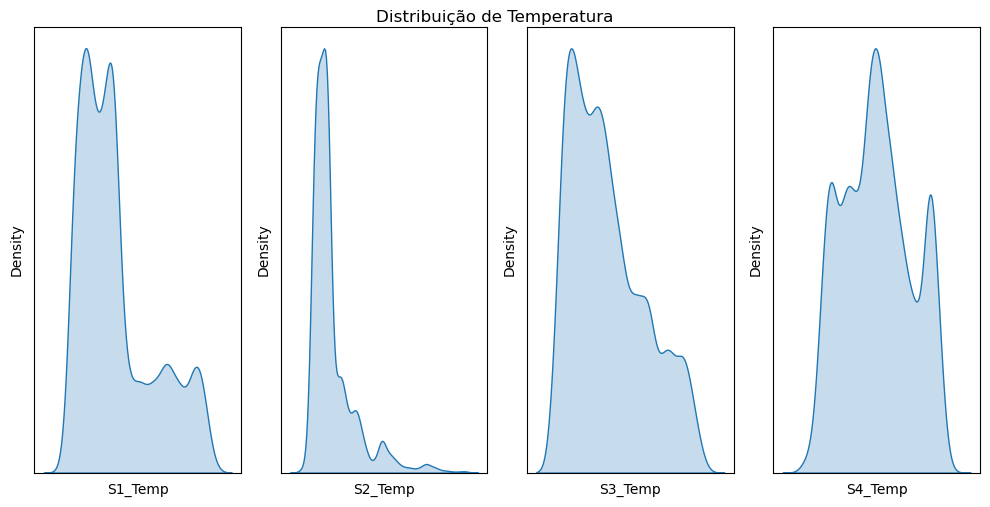

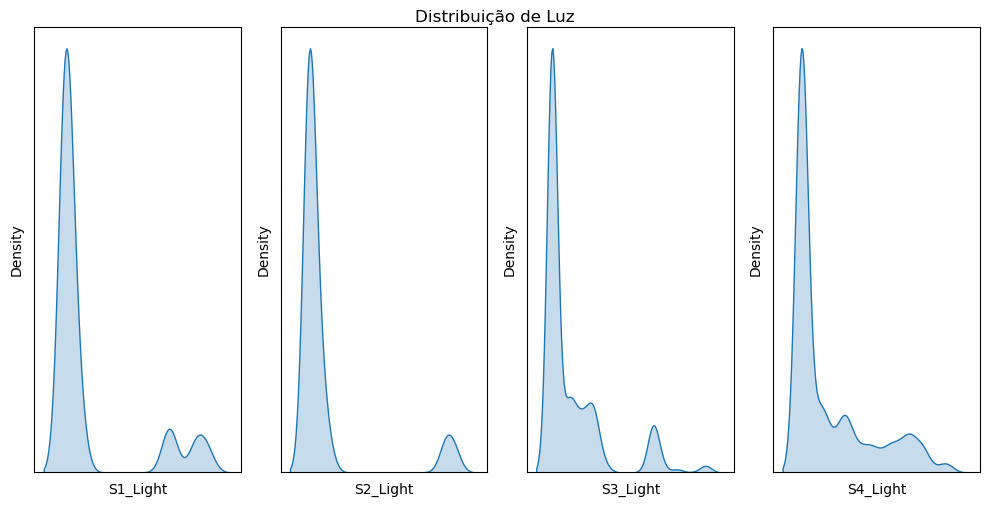

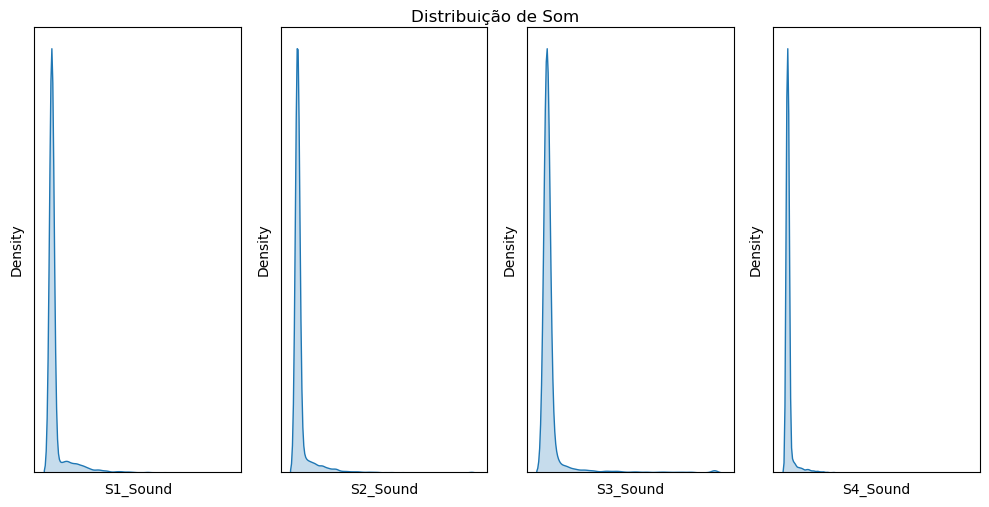

In [37]:
fig, ax = plt.subplots(1,4, figsize = (10,5))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"S{index + 1}_Temp",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Temp")
fig.tight_layout()
plt.suptitle("Distribuição de Temperatura",va = 'baseline')
plt.show()

################################################################
fig, ax = plt.subplots(1,4, figsize = (10,5))

ax = ax.flatten()

for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"S{index + 1}_Light",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Light")
fig.tight_layout()
plt.suptitle("Distribuição de Luz",va = 'baseline')
plt.show()

################################################################
fig, ax = plt.subplots(1,4, figsize = (10,5))
for index, axis in enumerate(ax):
    axis = sns.kdeplot(data = df,
               ax = axis,
               x = f"S{index + 1}_Sound",
               fill = True
               )
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_xlabel(f"S{index + 1}_Sound")
fig.tight_layout()
plt.suptitle("Distribuição de Som",va = 'baseline')
plt.show()

De um modo geral, conseguimos perceber que os dados estão "desviados" para a esquerda ("positively skewed"), portanto, não temos, de todo, uma distribuição normal no nosso dataset. Isto é relevante também para percebermos o método a utilizar na nossa correlação: como não temos uma distribuição normal padrão, o melhor método a utilizar é a correlação de *Spearman’s rho*. Observe-se também que os dados não seguem uma linha específica na sua dispersão.

#### Correlação

<AxesSubplot:title={'center':'Correlação entre features'}>

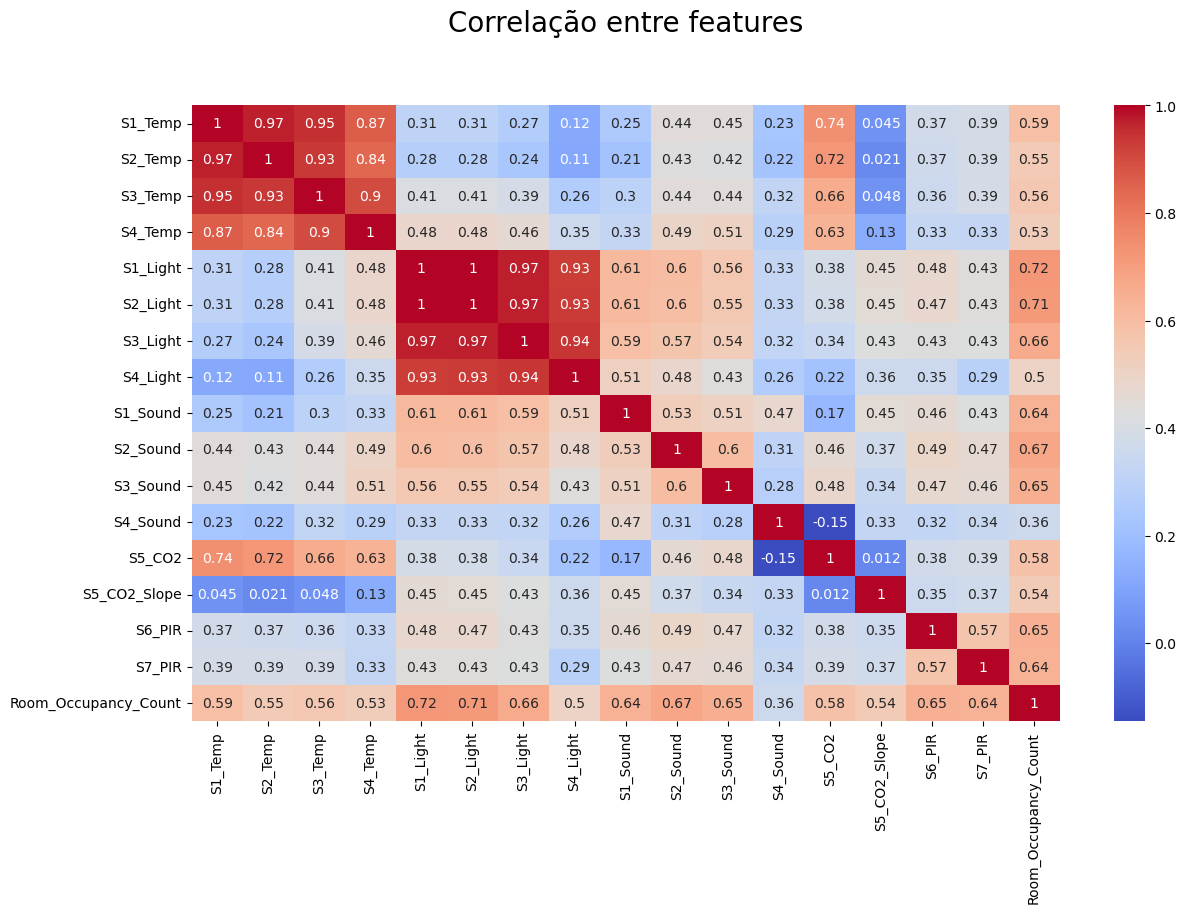

In [38]:
plt.subplots(figsize=(14,8))
plt.title("Correlação entre features", y = 1.03,fontsize = 20, pad = 40)
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap='coolwarm')

Vamos, então, efetuar o pré-processamento dos dados.

Seguir para o notebook 1.